In [1]:
import os
os.chdir('/home/reffert/DeepAR_InfluenzaForecast')
from PythonFiles.model import model, preprocessing, split_forecasts_by_week, plot_coverage, print_forecasts_by_week, forecast_by_week, train_test_split
from PythonFiles.Configuration import Configuration
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.rolling_dataset import generate_rolling_dataset,StepStrategy
config = Configuration()
influenza_df = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/Notebooks/DataProcessing/influenza.csv", sep=',')
population_df = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/Notebooks/DataProcessing/PopulationVector.csv", sep=',')
neighbourhood_df = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/Notebooks/DataProcessing/AdjacentMatrix.csv", sep=',', index_col=0)

In [2]:
config.train_start_time = datetime(2010,1,1,0,0,0)
config.train_end_time = datetime(2016,9,30,23,0,0)
config.test_end_time = datetime(2018,9,30,23,0,0)
overall_evaluation_df = pd.DataFrame()

data_splits_dict = {}
output_dict = {}

locations = list(influenza_df.location.unique())
#Process the df into a uniformly spaced df
without_features_df = influenza_df.loc[influenza_df.location.isin(locations), ['value', 'location', 'date','week']]
without_features_df = preprocessing(config, without_features_df, check_count=False, output_type="corrected_df")
# Add features to a new df
with_features_df = without_features_df.copy()
for location in locations:
    with_features_df.loc[with_features_df.location == location, "population"] = int(population_df.loc[population_df.Location == location, "2011"].values[0])
    with_features_df.loc[with_features_df.location == location, locations] = neighbourhood_df.loc[neighbourhood_df.index==location,locations].values[0]

# Creating the different splits

In [3]:
# Data split with no additional features and training start in 2010
data_splits_dict["without_features_2010"] = list(train_test_split(config, without_features_df))
data_splits_dict["with_features_2010"] = list(train_test_split(config, with_features_df))

# Change the beginning of the training period
config.train_start_time = datetime(1999,1,1,0,0,0)
data_splits_dict["without_features_2000"] = list(train_test_split(config, without_features_df))
data_splits_dict["with_features_2000"] = list(train_test_split(config, with_features_df))

# Model fitting

In [13]:
model_dict = {"DeepAR":config.deeparestimator, "FFNN":config.feedforwardestimator}
for data_split in data_splits_dict.keys():
    print(data_split)
    forecasts_dict, evaluator_df_dict = forecast_by_week(config, data_splits_dict[data_split][0], data_splits_dict[data_split][1], locations, model_dict)
    output_dict[data_split] = [forecasts_dict, evaluator_df_dict]
    #plot_coverage(config, evaluator_df_dict)

without_features_2010


100%|██████████| 50/50 [00:03<00:00, 14.72it/s, epoch=8/8, avg_epoch_loss=0.822]
Running evaluation: 411it [00:01, 226.42it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:01, 210.36it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:01, 223.53it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:01, 211.81it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
 

with_features_2010


100%|██████████| 50/50 [00:02<00:00, 17.49it/s, epoch=8/8, avg_epoch_loss=0.882]
Running evaluation: 411it [00:01, 243.65it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:01, 276.81it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:01, 253.41it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:01, 259.73it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
 

without_features_2000


100%|██████████| 50/50 [00:03<00:00, 14.64it/s, epoch=8/8, avg_epoch_loss=0.918]
Running evaluation: 411it [00:01, 252.47it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:01, 268.16it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:01, 258.90it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:01, 266.79it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
 

with_features_2000


100%|██████████| 50/50 [00:03<00:00, 14.13it/s, epoch=8/8, avg_epoch_loss=0.976]
Running evaluation: 411it [00:01, 248.88it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:01, 233.72it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:01, 294.70it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:01, 303.12it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
 

# Final Evaluation

In [49]:
final_evaluation_df = pd.DataFrame()
for data_split in output_dict.keys():
    forecasts_dict = output_dict[data_split][0]
    evaluator_df_dict = output_dict[data_split][1]
    #print(data_split)
    #plot_coverage(config, evaluator_df_dict)
    for key in evaluator_df_dict.keys():
        evaluation_df = evaluator_df_dict[key].copy()
        evaluation_df = evaluation_df.loc[evaluation_df.item_id.isin([item_id for item_id in evaluation_df.item_id if "aggregate" in item_id]),]        
        evaluation_df['ID'] = str(data_split) + str(key)
        final_evaluation_df = pd.concat([final_evaluation_df, evaluation_df])
for i in range(1,5):
    print(f"Week-{i}-Ahead")
    print(final_evaluation_df.loc[final_evaluation_df.item_id == "aggregated {"f"{i}"+"}" ,["ID", "mean_WIS", "MAE_Coverage"]].reset_index(drop=True))

Week-1-Ahead
                            ID    mean_WIS  MAE_Coverage
0  without_features_2010DeepAR  378.674487      0.266118
1    without_features_2010FFNN  647.993431      0.104901
2     with_features_2010DeepAR  515.051634      0.284906
3       with_features_2010FFNN  700.086896      0.108682
4  without_features_2000DeepAR  504.842614      0.274528
5    without_features_2000FFNN  639.180587      0.099212
6     with_features_2000DeepAR  514.329805      0.276684
7       with_features_2000FFNN  539.230587      0.079404
Week-2-Ahead
                            ID    mean_WIS  MAE_Coverage
0  without_features_2010DeepAR  432.011105      0.266916
1    without_features_2010FFNN  722.248071      0.098099
2     with_features_2010DeepAR  504.016979      0.295386
3       with_features_2010FFNN  680.608151      0.097336
4  without_features_2000DeepAR  532.123097      0.287516
5    without_features_2000FFNN  777.333959      0.111264
6     with_features_2000DeepAR  548.498279      0.287342
7    

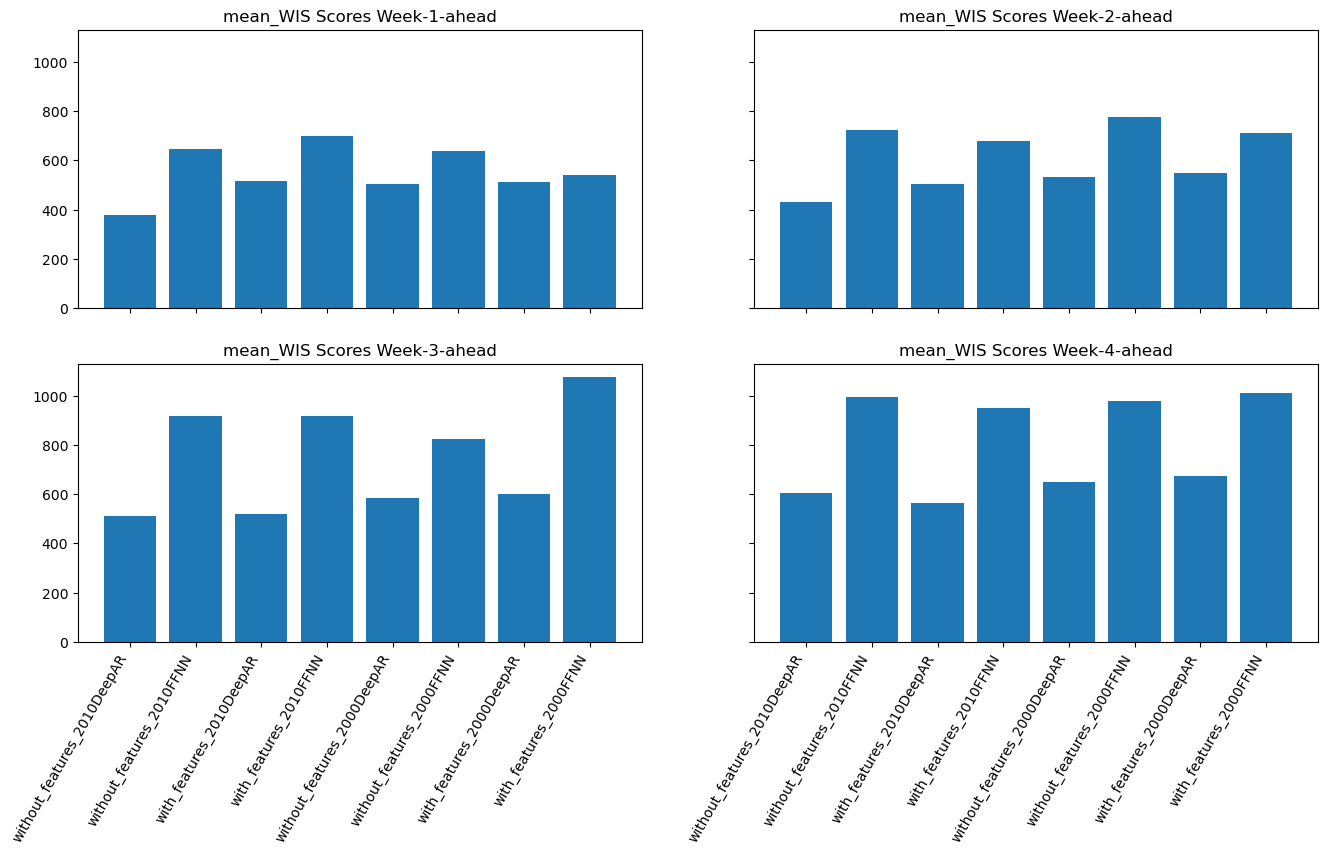

In [44]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 9), sharey=True)
for i in range(1,5):
    if i == 1:
        plotnumber = (0, 0)
    if i == 2:
        plotnumber = (0, 1)
    if i == 3:
        plotnumber = (1, 0)
    if i == 4:
        plotnumber = (1, 1)
    axs[plotnumber].bar(final_evaluation_df.loc[final_evaluation_df.item_id == "aggregated {"f"{i}"+"}","ID"], final_evaluation_df.loc[final_evaluation_df.item_id == "aggregated {"f"{i}"+"}","mean_WIS"])
    axs[plotnumber].set_title(f"mean_WIS Scores Week-{i}-ahead")
fig.autofmt_xdate(rotation=60, ha='right')
plt.show()